Saving dataset for assignment 2.csv to dataset for assignment 2 (2).csv


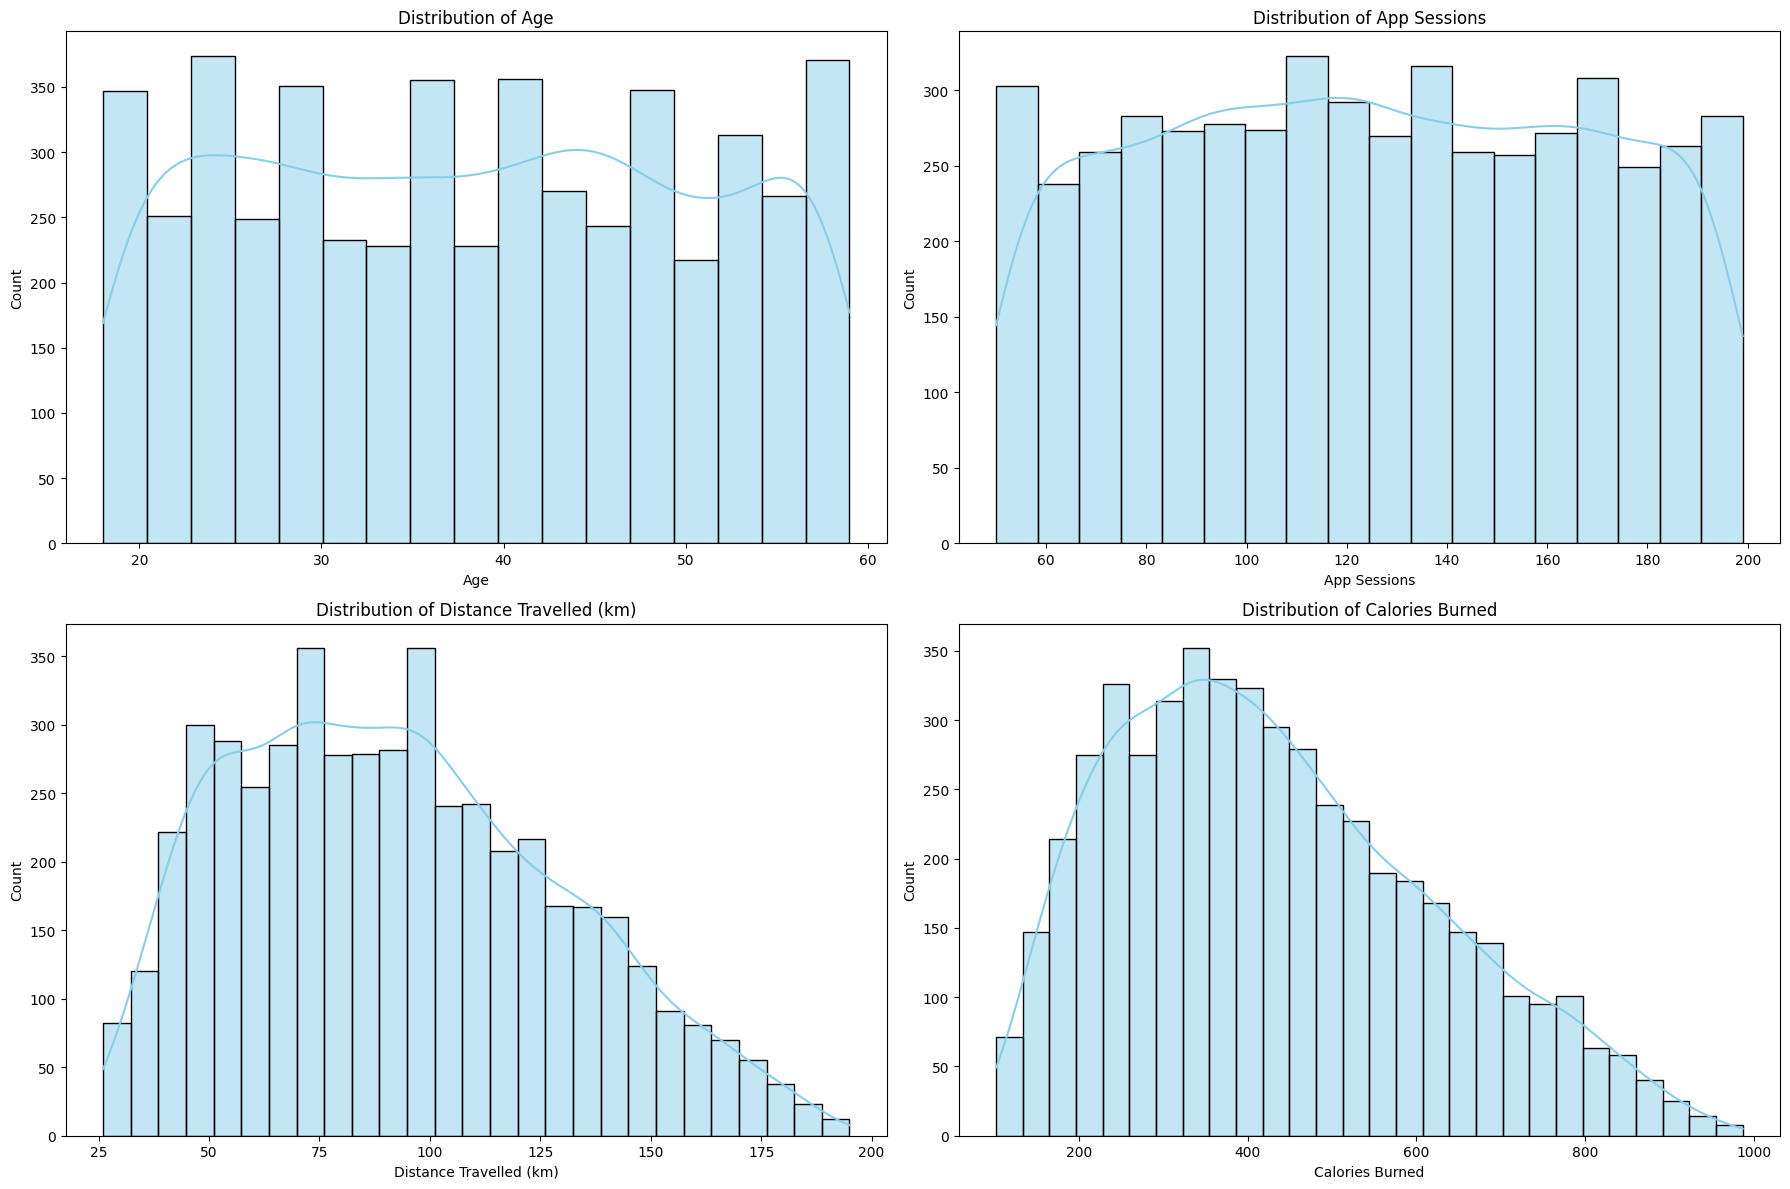

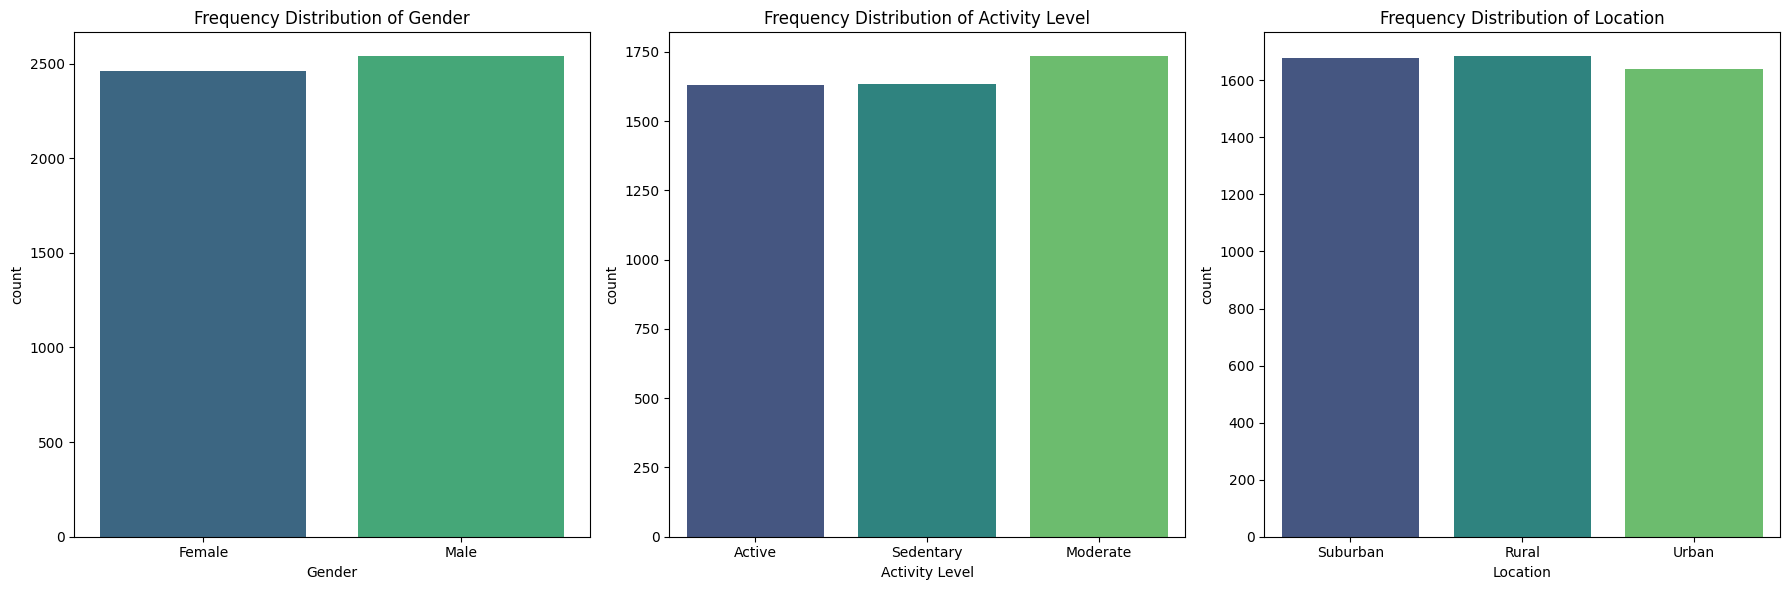

Missing values in each column:
User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64


In [3]:
# Ensure necessary libraries are installed
!pip install matplotlib seaborn pandas

# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is a CSV file
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Setting up visualizations for numerical features
plt.figure(figsize=(18, 12))

# Plotting histograms for numerical features
numerical_columns = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Checking frequency distribution for categorical features
categorical_columns = ['Gender', 'Activity Level', 'Location']

# Plotting bar charts for categorical features
plt.figure(figsize=(18, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=column, hue=column, palette='viridis', dodge=False)
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.legend([], [], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()

# Checking for missing values
missing_values = data.isnull().sum()

# Displaying missing values
print("Missing values in each column:")
print(missing_values)


Saving dataset for assignment 2.csv to dataset for assignment 2 (3).csv


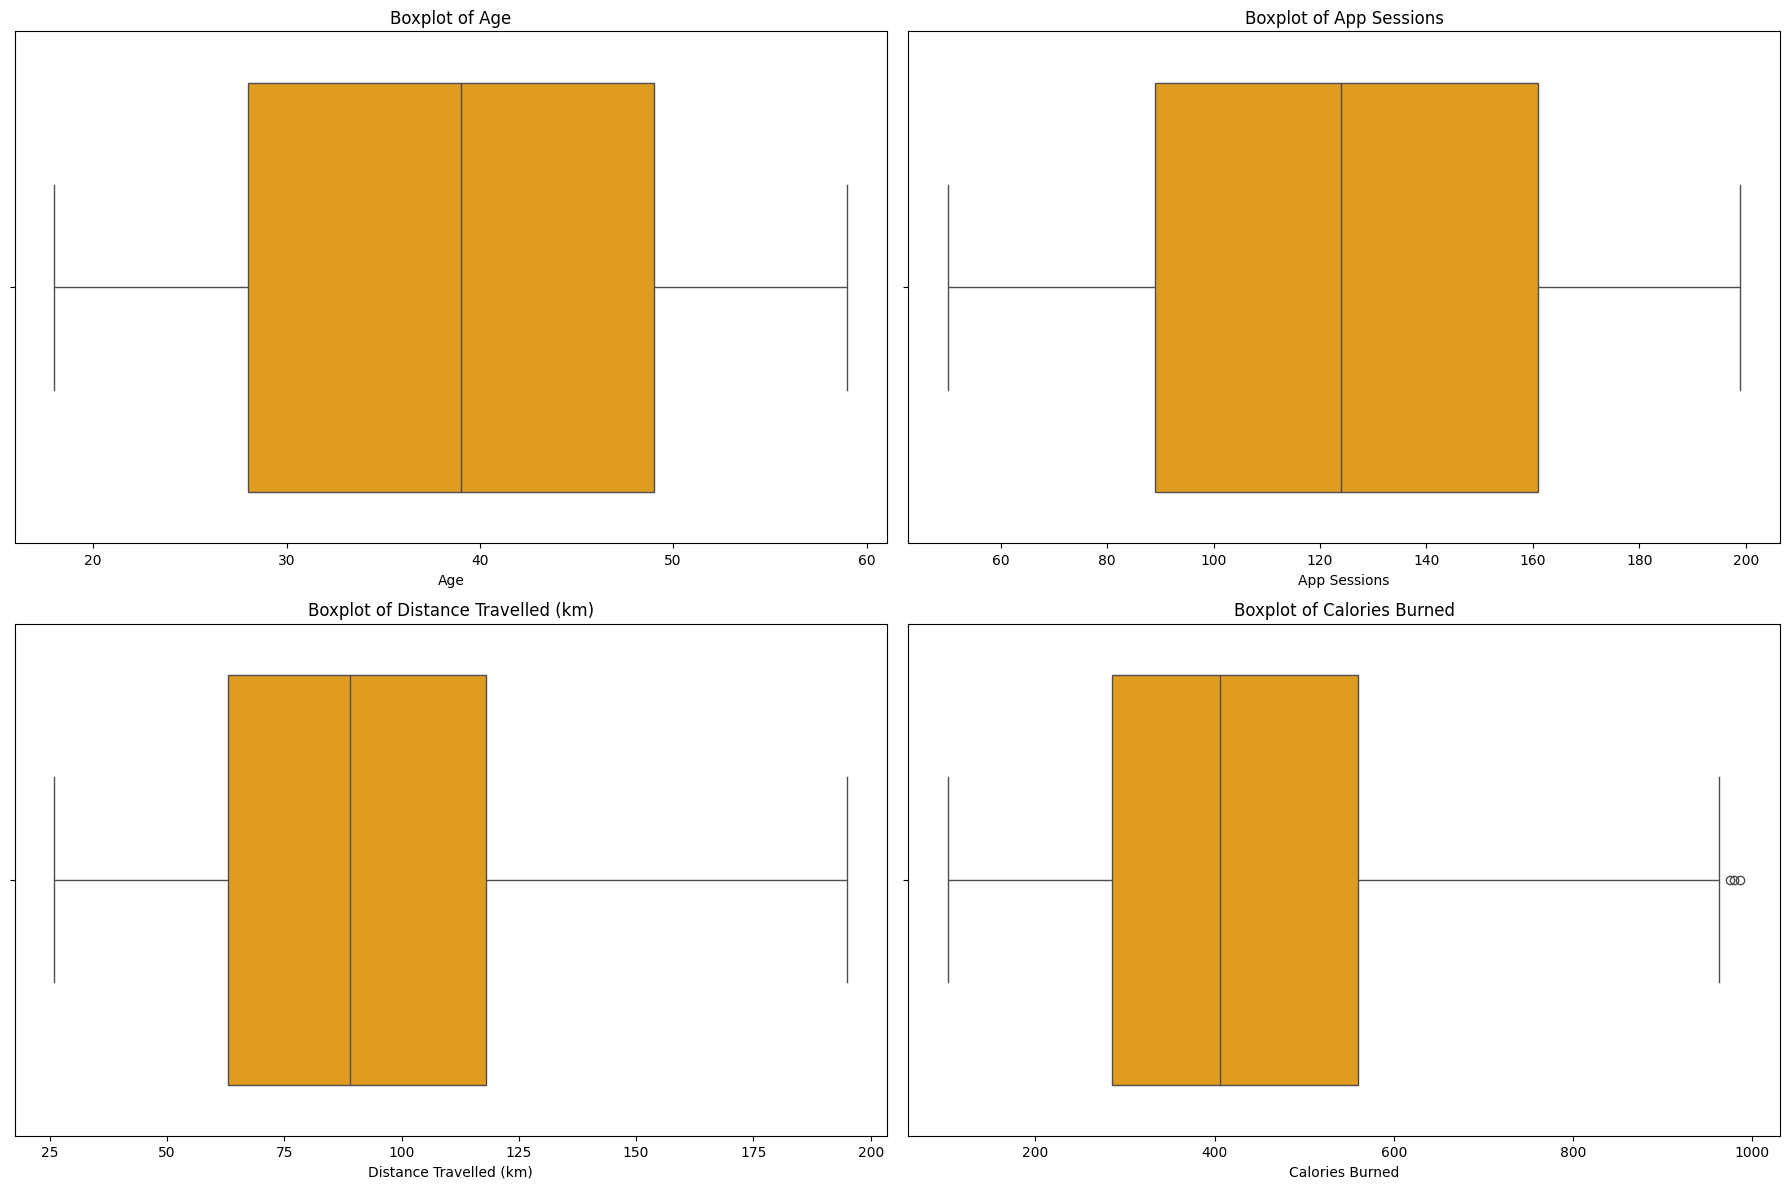

Number of outliers detected using Z-score:
{'Age': 0, 'App Sessions': 0, 'Distance Travelled (km)': 0, 'Calories Burned': 0}

Number of outliers detected using IQR method:
{'Age': 0, 'App Sessions': 0, 'Distance Travelled (km)': 0, 'Calories Burned': 3}


In [4]:
# Ensure necessary libraries are installed
!pip install matplotlib seaborn pandas numpy scipy

# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Load  dataset here
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is a CSV file
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Define numerical columns (ensure these columns exist in your dataset)
numerical_columns = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']

# Setting up the figure for boxplots
plt.figure(figsize=(18, 12))

# Plotting boxplots for numerical features to detect outliers
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Z-score based outlier detection
outliers = {}
for column in numerical_columns:
    z_scores = np.abs(stats.zscore(data[column]))
    outliers[column] = (z_scores > 3).sum()

# IQR-based outlier detection
iqr_outliers = {}
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

# Displaying the number of outliers detected by Z-score and IQR methods
print("Number of outliers detected using Z-score:")
print(outliers)

print("\nNumber of outliers detected using IQR method:")
print(iqr_outliers)


Saving dataset for assignment 2.csv to dataset for assignment 2 (12).csv


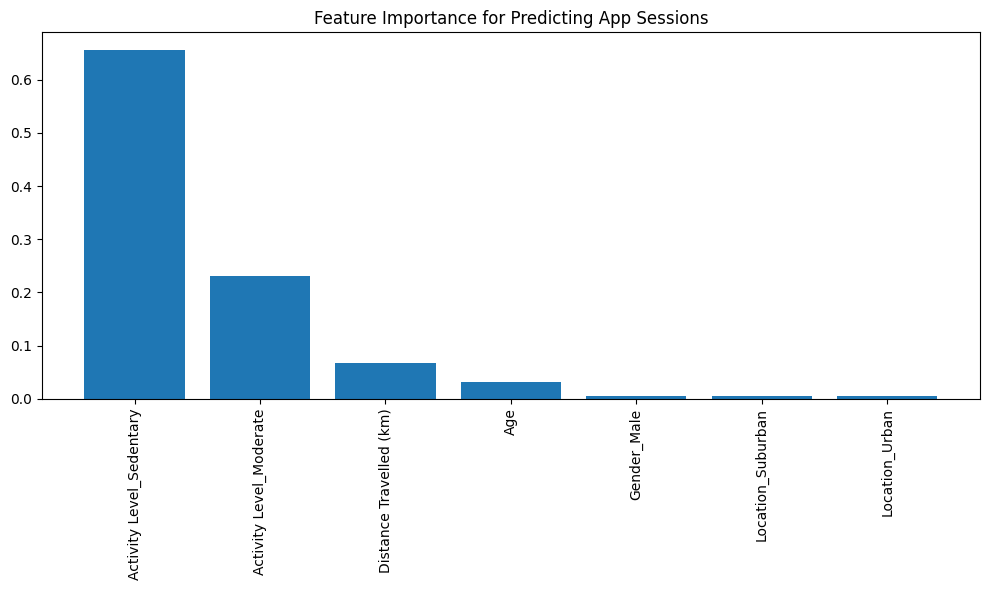

In [15]:
# Install necessary packages (run this if you're using Colab)
# !pip install seaborn scikit-learn

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (ensure the dataset is uploaded to your Colab environment)
# Upload from your local files and load the CSV file using pandas
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Assuming the uploaded file is a CSV file
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Encode categorical variables (Gender, Activity Level, Location) using dummy variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'], drop_first=True)

# Define features (X) and target (y) for predicting 'App Sessions'
X = data_encoded.drop(columns=['User ID', 'App Sessions', 'Calories Burned'])
y = data_encoded['App Sessions']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Predicting App Sessions")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()




Saving dataset for assignment 2.csv to dataset for assignment 2 (21).csv


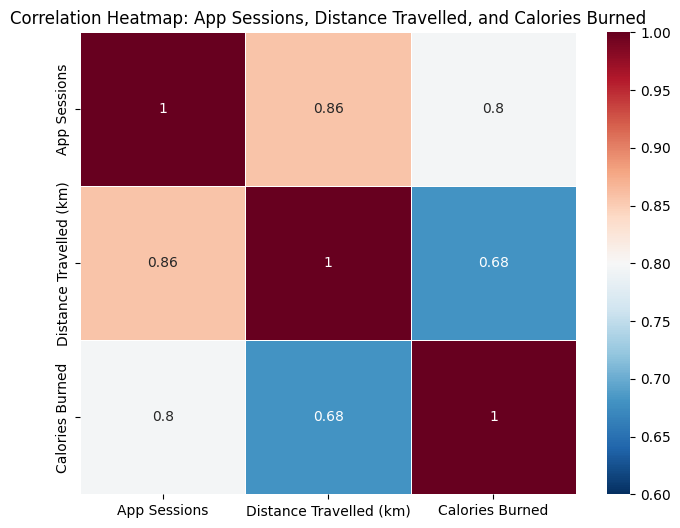

In [24]:
# Install necessary packages (if not already installed)
!pip install seaborn matplotlib

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the uploaded dataset
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Select relevant features for correlation analysis
selected_features = data[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Plotting the correlation matrix using a heatmap with adjusted colors
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=0.6, vmax=1, center=0.8, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap: App Sessions, Distance Travelled, and Calories Burned')
plt.show()






Saving dataset for assignment 2.csv to dataset for assignment 2 (24).csv
Regression Model Results:
                          MSE       RMSE  R² Score
Linear Regression  140.031492  11.833490  0.924038
Ridge Regression   140.003649  11.832314  0.924053
Lasso Regression   140.340760  11.846551  0.923870
Random Forest      127.873688  11.308125  0.930633


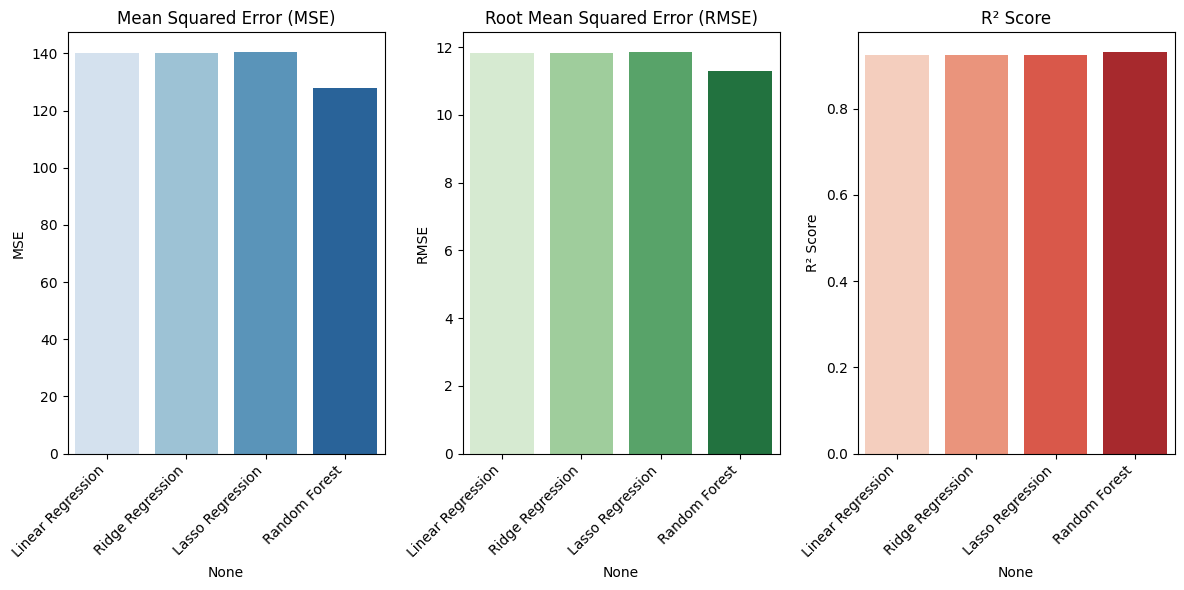

In [27]:
# Install necessary packages (if not already installed)
!pip install scikit-learn matplotlib seaborn

# Import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the uploaded dataset
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# One-hot encode categorical variables (Gender, Activity Level, and Location)
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'], drop_first=True)

# Define the feature set and target variable
X = data_encoded.drop(columns=['User ID', 'App Sessions'])
y = data_encoded['App Sessions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Initialize results dictionary
results = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R² Score': r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display the results
print("Regression Model Results:")
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))

# MSE Plot
plt.subplot(1, 3, 1)
sns.barplot(x=results_df.index, y='MSE', data=results_df, hue=results_df.index, dodge=False, legend=False, palette='Blues')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')

# RMSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x=results_df.index, y='RMSE', data=results_df, hue=results_df.index, dodge=False, legend=False, palette='Greens')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')

# R² Score Plot
plt.subplot(1, 3, 3)
sns.barplot(x=results_df.index, y='R² Score', data=results_df, hue=results_df.index, dodge=False, legend=False, palette='Reds')
plt.title('R² Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




Saving dataset for assignment 2.csv to dataset for assignment 2 (27).csv


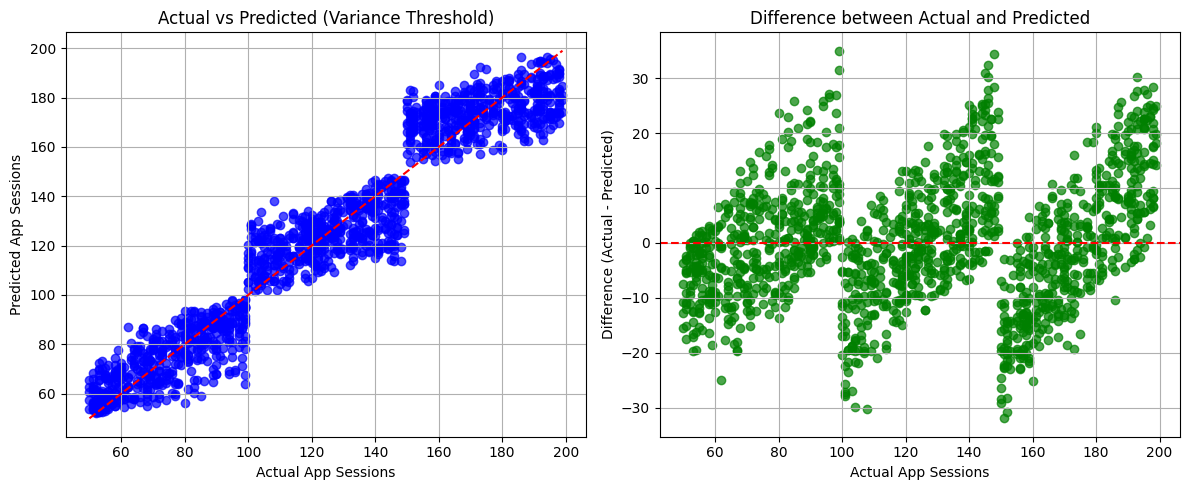

In [30]:
# Install necessary packages (if not already installed)
!pip install scikit-learn matplotlib seaborn

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the uploaded dataset
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# One-hot encode categorical variables (Gender, Activity Level, and Location)
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'], drop_first=True)

# Define the feature set and target variable
X = data_encoded.drop(columns=['User ID', 'App Sessions'])
y = data_encoded['App Sessions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 5))

# Actual vs Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Line for perfect prediction
plt.xlabel('Actual App Sessions')
plt.ylabel('Predicted App Sessions')
plt.title('Actual vs Predicted (Variance Threshold)')
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.7, color='green')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Actual App Sessions')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Difference between Actual and Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()





Saving dataset for assignment 2.csv to dataset for assignment 2 (2).csv


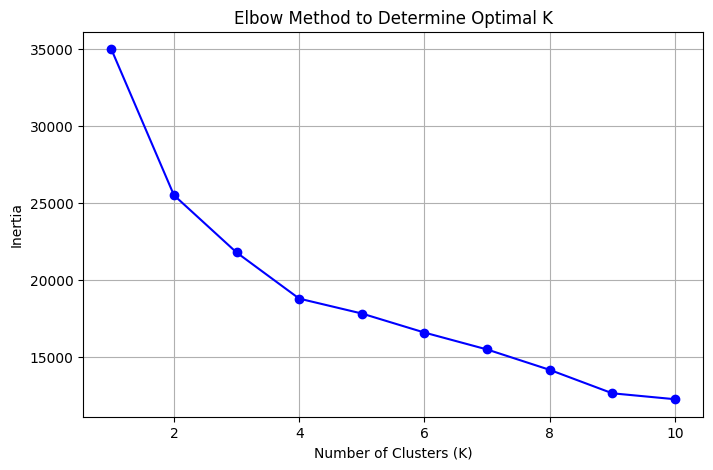

In [4]:
# Install necessary packages (if not already installed)
!pip install matplotlib scikit-learn pandas

# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Upload and load the dataset
from google.colab import files
uploaded = files.upload()

# Load the uploaded dataset
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# One-hot encode categorical variables (Gender, Activity Level, Location)
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'], drop_first=True)

# Select the features for clustering (adjust feature names based on your dataset)
features = ['Age', 'Distance Travelled (km)', 'Calories Burned',
            'Activity Level_Sedentary', 'Gender_Male', 'Location_Urban', 'Location_Suburban']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded[features])

# Use the Elbow method to determine the optimal number of clusters (K)
inertia = []  # List to store inertia values for each K
K = range(1, 11)  # Testing K values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Store the inertia value

# Plot the Elbow method to find the best K
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



Saving dataset for assignment 2.csv to dataset for assignment 2 (9).csv
Clustering Evaluation Metrics for K=3 to K=6
                      Model  Silhouette Score  Calinski-Harabasz Index  \
0                    KMeans          0.271321              1677.829557   
1   Hierarchical Clustering          0.271321              1677.829557   
2                       GMM          0.271321              1677.829557   
3                    KMeans          0.246114              1357.028232   
4   Hierarchical Clustering          0.237912              1391.542626   
5                       GMM          0.246609              1355.790195   
6                    KMeans          0.228095              1253.352443   
7   Hierarchical Clustering          0.250685              1287.880383   
8                       GMM          0.228458              1252.220934   
9                    KMeans          0.228961              1132.386542   
10  Hierarchical Clustering          0.246380              1269.32769

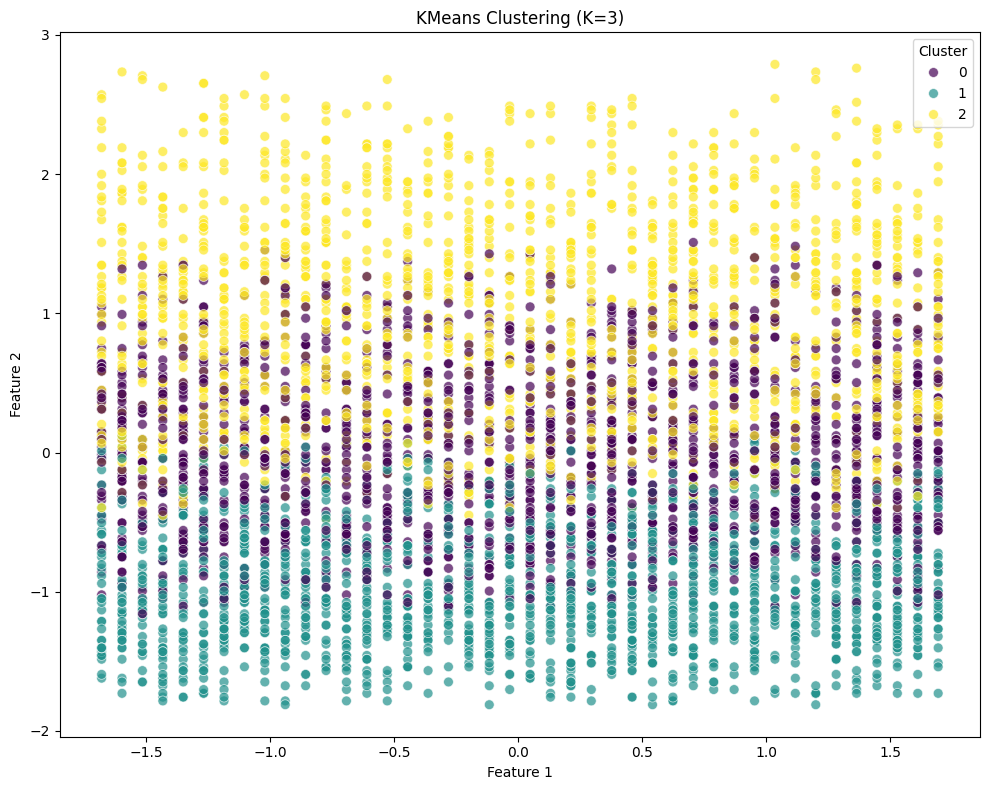

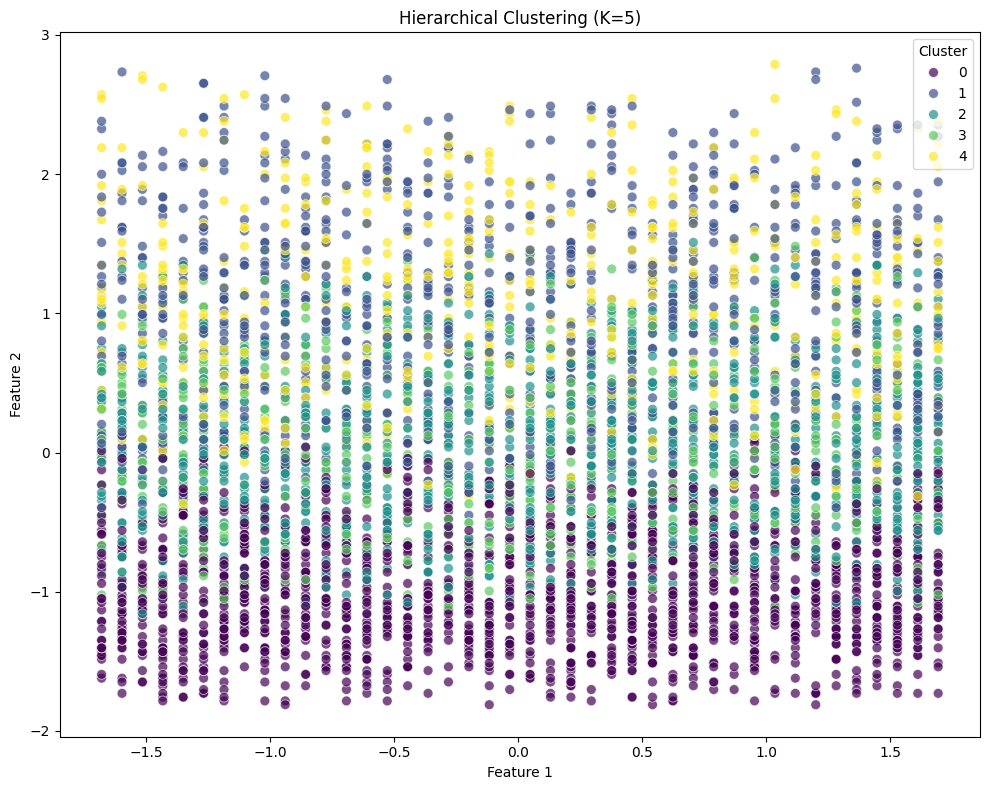

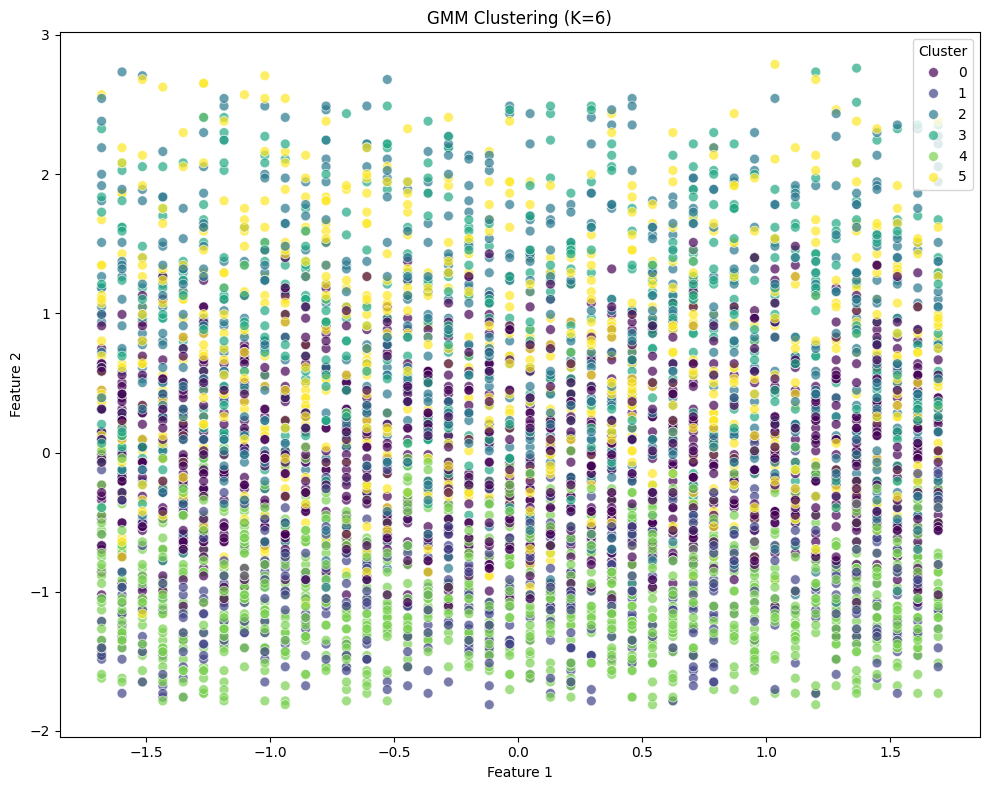

In [11]:
# Install necessary packages (if not already installed)
!pip install scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Upload and load the dataset
from google.colab import files
uploaded = files.upload()

# Load the uploaded dataset
import io
data = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# One-hot encode categorical variables (Gender, Activity Level, Location)
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'], drop_first=True)

# Select the features for clustering
features = data_encoded.drop(columns=['User ID', 'App Sessions'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Define a function to compute clustering evaluation metrics
def evaluate_clustering(X_scaled, n_clusters):
    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)

    # Hierarchical Clustering (Agglomerative)
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X_scaled)
    agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
    agglo_ch = calinski_harabasz_score(X_scaled, agglo_labels)

    # Gaussian Mixture Model (GMM)
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
    gmm_ch = calinski_harabasz_score(X_scaled, gmm_labels)
    gmm_bic = gmm.bic(X_scaled)
    gmm_aic = gmm.aic(X_scaled)

    # Store results in a DataFrame
    results = pd.DataFrame({
        'Model': ['KMeans', 'Hierarchical Clustering', 'GMM'],
        'Silhouette Score': [kmeans_silhouette, agglo_silhouette, gmm_silhouette],
        'Calinski-Harabasz Index': [kmeans_ch, agglo_ch, gmm_ch],
        'BIC (GMM only)': [None, None, gmm_bic],
        'AIC (GMM only)': [None, None, gmm_aic]
    })

    return results

# Evaluate clustering for K=3 to K=6
results_list = []
for k in range(3, 7):
    results = evaluate_clustering(X_scaled, k)
    results['K'] = k
    results_list.append(results)

# Concatenate results for all K values
all_results = pd.concat(results_list, ignore_index=True)

# Display the evaluation metrics
print("Clustering Evaluation Metrics for K=3 to K=6")
print(all_results)

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Cluster', loc='upper right')
    plt.tight_layout()
    plt.show()

# Step 1: KMeans with K=3 (Optimal for KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, 'KMeans Clustering (K=3)')

# Step 2: Hierarchical Clustering with K=5 (Optimal for Hierarchical Clustering)
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
plot_clusters(X_scaled, agglo_labels, 'Hierarchical Clustering (K=5)')

# Step 3: GMM with K=6 (Optimal for GMM)
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plot_clusters(X_scaled, gmm_labels, 'GMM Clustering (K=6)')



